In [1]:
import dv_processing as dv
from snn_delays.snn_refactored import SNN
from snn_delays.utils.dataset_loader import DatasetLoader
from snn_delays.utils.train_utils_refact_minimal import train, get_device, propagate_batch_simple
from snn_delays.utils.test_behavior import tb_save_max_last_refact

device = get_device()
dataset = 'davis_loihi'
total_time = 100
batch_size = 64
folder_name = 'ABCXO_15Hz_64_robust'

# DATASET
DL = DatasetLoader(dataset=dataset,
                  caching='memory',
                  num_workers=0,
                  batch_size=batch_size,
                  total_time=total_time,
                  sensor_size_to = 64,
                  folder_name = folder_name)
train_loader, test_loader, dataset_dict = DL.get_dataloaders()

Running on: cuda:0
[Downsample(time_factor=1, spatial_factor=1.0, sensor_size=None, target_size=None), ToFrame(sensor_size=(64, 64, 2), time_window=None, event_count=None, n_time_bins=100, n_event_bins=None, overlap=0, include_incomplete=False)]


In [2]:
dataset_dict['time_ms'] = 100
dataset_dict

{'num_input': 8192,
 'num_training_samples': 7500,
 'num_output': 5,
 'dataset_name': 'davis_loihi',
 'time_ms': 100}

Delta t: 1.0 ms
Delta t: 1.0 ms
Delta t: 1.0 ms
SNN(
  (criterion): MSELoss()
  (layers): ModuleList(
    (0): FeedforwardSNNLayer(
      (linear): Linear(in_features=8192, out_features=96, bias=False)
    )
    (1): FeedforwardSNNLayer(
      (linear): Linear(in_features=96, out_features=96, bias=False)
    )
    (2): FeedforwardSNNLayer(
      (linear): Linear(in_features=96, out_features=5, bias=False)
    )
  )
)
Epoch [1/20], learning_rates 0.001000, 0.100000


c:\Users\Alberto\anaconda3\envs\deeplearning\lib\site-packages\torch\optim\lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Step [39/117], Loss: 0.14516
Step [78/117], Loss: 0.11166
Step [117/117], Loss: 0.11405
Time elasped: 141.384361743927
1456
Test Loss: 0.10348298789366432
Avg spk_count per neuron for all 100 time-steps 1157.07760989011
Test Accuracy of the model on the test samples: 75.755

Model saved in  C:\Users\Alberto\OneDrive - UNIVERSIDAD DE SEVILLA\PythonData\Checkpoints\abcxo_64_96_1ms_15Hz
saving max acc: 75.75549450549451
Model saved in  C:\Users\Alberto\OneDrive - UNIVERSIDAD DE SEVILLA\PythonData\Checkpoints\abcxo_64_96_1ms_15Hz
Epoch [2/20], learning_rates 0.001000, 0.100000
Step [39/117], Loss: 0.08673
Step [78/117], Loss: 0.07708
Step [117/117], Loss: 0.07999
Time elasped: 54.657148361206055
1456
Test Loss: 0.07402296429095061
Avg spk_count per neuron for all 100 time-steps 1292.0782967032967
Test Accuracy of the model on the test samples: 90.247

Model saved in  C:\Users\Alberto\OneDrive - UNIVERSIDAD DE SEVILLA\PythonData\Checkpoints\abcxo_64_96_1ms_15Hz
saving max acc: 90.2472527472

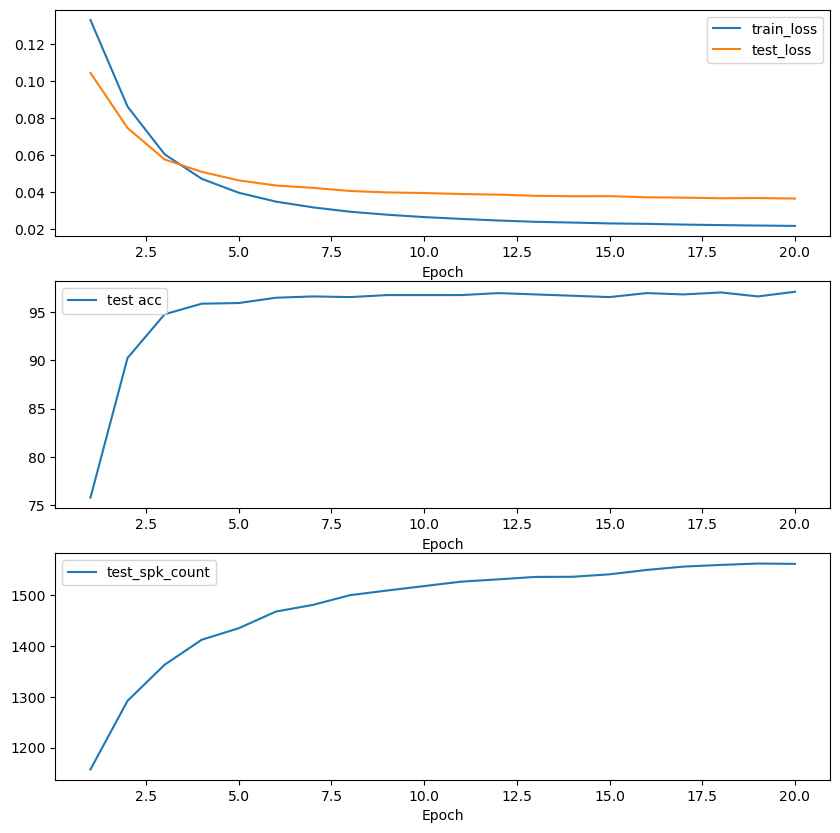

In [4]:
ckpt_dir = 'abcxo_64_96_1ms_15Hz'

structure = (96, 2, 'f')

extra_kwargs = {}

#tau_m = 50 # initial experiments
tau_m = 5.0 

snn = SNN(dataset_dict=dataset_dict, structure=structure, tau_m=tau_m, win=total_time, loss_fn='spk_count', batch_size=batch_size, device=device, 
          **extra_kwargs)

#snn.input2spike_th = 0.5

snn.model_name = 'abcxo_f'
snn.set_layers()
snn.to(device)
print(snn)

num_epochs = 20
lr = 1e-3
train(snn, train_loader, test_loader, lr, num_epochs, ckpt_dir=ckpt_dir,
       test_behavior=tb_save_max_last_refact, scheduler=(10, 0.95), test_every=1, freeze_taus=True)